In [87]:
import numpy
# scipy.special для вызова сигмоиды
import scipy.special
# для работы с векторами
import matplotlib.pyplot
# чтобы запуск происходил в блокноте
%matplotlib inline

In [88]:
# helper to load data from PNG image files
import imageio
# glob helps select multiple files using patterns
import glob

In [89]:
import numpy
import scipy.special

# определние класса нейронной сети
class neuralNetwork:
    
    # инициализировать нейронную сеть
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # задать количество узлов во входном, скрытом и выходном слое
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # коэффициент обучения
        self.lr = learningrate
        
        # Матрицы весовх коэффицинетов между входным слоем и скрытым (wih) и между скртым и выходным слоем (who)
        # весовые коэффициенты связей между узлoм i и узлом j следующего слоя - w_i_j
        self.wih = numpy.random.normal(0.0, pow(self.inodes, - 0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, - 0.5), (self.onodes, self.hnodes))
        
        # Определение функции активации
        self.activation_function = lambda x: scipy.special.expit(x)
                 
        pass
    
    # тренировка нейронной сети
    def train(self, inputs_list, targets_list):
        # преобразовать список входных значений в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin = 2).T
        
        # расчитать входящие сигналы для скрытого слоя
        hidden_inputs = numpy.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # рассчитать входящие сигналы для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        
        # ошибки выходного слоя
        outputs_errors = targets - final_outputs
        # ошибки скрытого слоя
        hidden_errors = numpy.dot(self.who.T, outputs_errors)
        
        # обновить коэф связи между скрытым и выхдными слоями
        self.who += self.lr * numpy.dot((outputs_errors * final_outputs * (1.0 - final_outputs)), 
                                        numpy.transpose(hidden_outputs))
        
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        pass
        
        
        
    
    # опрос нейронной сети
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

In [90]:
# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# коэффициет обучения равен 0.1
learning_rate = 0.1

# создаем экземпляр нейронной сети
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)


In [91]:
# Загрузка mnist training data CSV в список
training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [92]:
# тренировка нейросети

# epochs это количество эпох для тренировки
epochs = 10

for e in range(epochs):
    # проход по всем записям в тренировочной неросети
    for record in training_data_list:
        # разделить заись по запятой
        all_values = record.split(',')
        # отмасштабировать и сместить входные значения
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # задать целевые значения (все 0.01, кроме целевого числа который приравняется к 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] явялется целевым ярлыком для этой записи
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [93]:
# наша собственная база изображений для распознования
our_own_dataset = []

In [94]:
for image_file_name in glob.glob('?.jpg'):
    print ("Загрузка... ", image_file_name)
    # проверка картнки: если первая картинка, то ярлык =1, в противном случае = 0
    if image_file_name == '1.jpg':
        label = 1
    else:
        label = 0
    # загрузка изображения из формата png в массив
    img_array = imageio.imread(image_file_name, as_gray=True)
    # изменения размера картинки из 28х28 в лист 784 значений. Инвертируем значения
    img_data  = 255.0 - img_array.reshape(784)
    # масштабируем значения в диапазоне рот 0.01 до 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    # добовляем ярлык и image data для тестового набора данных
    record = numpy.append(label,img_data)
    print(record)
    our_own_dataset.append(record)
    pass
print(our_own_dataset)

Загрузка...  1.jpg
0.017764706
0.8757647
[1.         0.23129413 0.23905884 0.24294119 0.24294119 0.23517647
 0.23517647 0.23517647 0.23905884 0.23905884 0.23905884 0.23517647
 0.25458825 0.23129413 0.24682353 0.22352943 0.25847059 0.24682353
 0.23517647 0.23905884 0.208      0.23517647 0.24294119 0.25847059
 0.22352943 0.24682353 0.24682353 0.24294119 0.24294119 0.23905884
 0.24294119 0.24682353 0.24294119 0.23905884 0.23517647 0.23905884
 0.23905884 0.23129413 0.24682353 0.23129413 0.26623529 0.21576472
 0.27011764 0.27011764 0.1924706  0.23517647 0.21576472 0.25847059
 0.23517647 0.27011764 0.25847059 0.24294119 0.29341176 0.2507059
 0.2507059  0.2507059  0.24682353 0.24682353 0.24682353 0.24682353
 0.24682353 0.24294119 0.23905884 0.23905884 0.24294119 0.24294119
 0.23129413 0.2507059  0.23905884 0.24682353 0.23905884 0.24682353
 0.21188237 0.23517647 0.31282353 0.14588237 0.22352943 0.23905884
 0.25458825 0.2507059  0.23517647 0.25458825 0.25458825 0.25458825
 0.25458825 0.2507059 

[[0.00604151]
 [0.00227602]
 [0.00262938]
 [0.01156602]
 [0.25076756]
 [0.01570418]
 [0.01043521]
 [0.00401736]
 [0.00542025]
 [0.00059813]]
network says  4
no match!


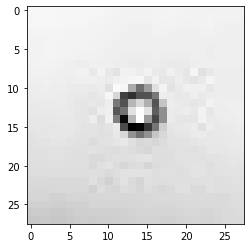

In [107]:
# тест нейронки с собственными картинками

# запись для теста (номер объекта)
item = 1

# изобразить картинку
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# правильный ответ - первое значение в нашем датасете
correct_label = our_own_dataset[item][0]
# данные - это оставшиеся значения
inputs = our_own_dataset[item][1:]

# запрашиваем у сети
outputs = n.query(inputs)
print (outputs)

# индекс наибольшего значения соответствует метке
label = numpy.argmax(outputs)
print("network says ", label)
# сравнение в правильным и неправильным ответом
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

In [ ]:
Данная попытка была основана на той идее, что существует csv файл с тренировочным дата сетом рукописных цифр, среди
которых есть 0. Предполагалось, что нейросеть используя тренировочный файл с датасетом будет распозновать шайбы как 0.
Но к сожалению, весь крепеж распознается как цифра 4. Поэтому скорее всего требуется следующий порядок действий:

1. Сделать 100 фото: 50 с винтом, 50 с шайбой
    1.1. Винт может быть разной формы, но должен лежать на одном и том же месте, его длина и диаметр должны быть одни и теже
    Съемка должна вестись на максимально белом фоне
    1.2. Шайбы можно отсканировать попробовать, но лучше сфотографировать, чтобы было хорошо различимая шайба
2. Подготовить 100 фото:
    2.1. Селать их квадратными (опционально)
    2.2. Сделать серыми
    2.3. Перевести в размер 28х28
    2.4. Сохранить в массив
    2.5. Сохранить в датасет. Если шайба, то label = 0, если винт label = 1.
    2.6. Датасет сохранить в CSV для тренировочных данных
3. Загрузить тренировочный дата сет в нейросеть
4. Загрузить случайны фото, обработать их
5. Проверить, что нейросеть распознает шайбы
